In [8]:
from my_functions import load_npy
import numpy as np
import matplotlib.pyplot as plt

In [9]:
N_runs     =["10","22"]     
N_channels =[0,1,4,6]       
Pl         =[-1,-1,-1,-1]   #polarity
P_channels ={}
for ch,pl in zip(N_channels,Pl): P_channels[ch]=pl

L_channels  =["SiPM1","SiPM2","PMT","SuperCell"]
RUNS=load_npy(N_runs, N_channels,P_channels)

#Customizable
PROP={};
PROP["sampling"]=4; #ns
PROP["NBins_Ped"]=250;

RUNS.keys()

dict_keys(['N_runs', 'N_channels', 'P_channels', '10', '22'])

In [14]:
#compute Pedestals:
from my_functions import compute_pedestal_variables

compute_pedestal_variables(RUNS,PROP["NBins_Ped"])
RUNS["10"][0].keys()
# for run in N_runs:
#     for ch in N_channels:
#         RUNS[run][ch]["Ped_STD"] =np.std (RUNS[run][ch]["ADC"][:,:PROP["NBins_Ped"]],axis=1)
#         RUNS[run][ch]["Ped_mean"]=np.mean(RUNS[run][ch]["ADC"][:,:PROP["NBins_Ped"]],axis=1)
#         RUNS[run][ch]["Ped_max"] =np.max (RUNS[run][ch]["ADC"][:,:PROP["NBins_Ped"]],axis=1)
#         RUNS[run][ch]["Ped_min"] =np.min (RUNS[run][ch]["ADC"][:,:PROP["NBins_Ped"]],axis=1)


In [15]:
from my_functions import compute_peak_variables

compute_peak_variables(RUNS)
RUNS["10"][0].keys()

dict_keys(['ADC', 'Sampling', 'EventNumber', 'TriggerTimeStamp', 'PCTimeStamp', 'NBins_wvf', 'Ped_STD', 'Ped_mean', 'Ped_max', 'Ped_min', 'Peak_amp', 'Peak_time'])

[]

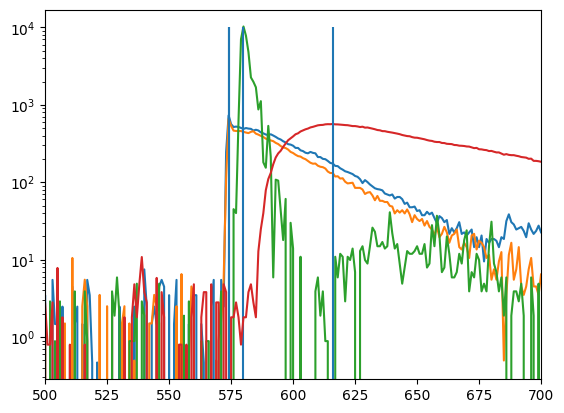

In [16]:
for ch in N_channels:
    plt.plot(P_channels[ch]*(RUNS["10"][ch]["ADC"][0]-RUNS["10"][ch]["Ped_mean"][0]))
    plt.vlines(RUNS["10"][ch]["Peak_time"][0],0,10000)

plt.xlim([500,700])
plt.semilogy()